In [1]:
import pycisTopic
pycisTopic.__version__

'2.0a0'

In [2]:
import pandas as pd

In [ ]:
df = pd.read_csv("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/BMMC/1.prepare_data/5.merge_peaks_from_5_super_groups.240524/matrix.atac.5_super_groups.csv.gz", 
                 compression='gzip', 
                 index_col=0)

In [10]:
df

,s1d1_TAGTTGTCACCCTCAC-1,s1d1_CTATGGCCATAACGGG-1,s1d1_CCGCACACAGGTTAAA-1,s1d1_TCATTTGGTAATGGAA-1,s1d1_ACCACATAGGTGTCCA-1,s1d1_TGGATTGGTTTGCGAA-1,s1d1_GACTTAGGTTGCGCGA-1,s1d1_GCCTTACTCGTTACAA-1,s1d1_GTAAGGTCAATAACCT-1,s1d1_AGCGCCTAGATGGACA-1,...,s4d9_ACTAATCCAGCAAGAT-1,s4d9_AGCATCCCACAGAACG-1,s4d9_ATTGAAGCACATTGCA-1,s4d9_CTATTCAGTTGTGATG-1,s4d9_TGAACAACAGTGAACG-1,s4d9_CGATTCCTCCTGGCTT-1,s4d9_AAACCGCGTTTGAGGC-1,s4d9_GCTGTACCACCGTTCC-1,s4d9_ACACTTGCAACTAGAA-1,s4d9_CACTTAAAGTCTGGGC-1
chr1-10010-10512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1-115495-115916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1-180477-181904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1-191243-191960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1-267886-268118,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrX-156008487-156008683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrX-156008873-156009316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrX-156019835-156020122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrX-156029840-156030373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from pycisTopic.cistopic_class import create_cistopic_object
cistopic_obj = create_cistopic_object(
    fragment_matrix = df
)

In [11]:
cistopic_obj

In [ ]:
!wget https://github.com/mimno/Mallet/releases/download/v202108/Mallet-202108-bin.tar.gz
!tar -xf Mallet-202108-bin.tar.gz

In [ ]:
!mkdir -p out_model_BMMC5

In [13]:
import os
os.environ['MALLET_MEMORY'] = '400G'
from pycisTopic.lda_models import run_cgs_models_mallet
# Configure path Mallet
mallet_path="Mallet-202108/bin/mallet"
# Run models
models=run_cgs_models_mallet(
    cistopic_obj,
    n_topics=[30, 40, 50],
    n_cpu=48,
    n_iter=500,
    random_state=555,
    alpha=50,
    alpha_by_topic=True,
    eta=0.1,
    eta_by_topic=False,
    tmp_path="out_model_BMMC5",
    save_path="out_model_BMMC5",
    mallet_path=mallet_path,
)

2024-06-07 11:28:39,474 cisTopic     INFO     Formatting input to corpus
2024-06-07 11:28:55,164 cisTopic     INFO     Running model with 30 topics
2024-06-07 11:28:55,166 LDAMalletWrapper INFO     Serializing temporary corpus to out_model_BMMC5/corpus.txt
2024-06-07 11:31:08,558 LDAMalletWrapper INFO     Converting temporary corpus to MALLET format with: Mallet-202108/bin/mallet import-file --preserve-case --keep-sequence --token-regex \S+ --input out_model_BMMC5/corpus.txt --output out_model_BMMC5/corpus.mallet
2024-06-07 11:33:39,890 LDAMalletWrapper INFO     Training MALLET LDA with: Mallet-202108/bin/mallet train-topics --input out_model_BMMC5/corpus.mallet --num-topics 30 --alpha 50 --beta 0.1 --optimize-interval 0 --num-threads 48 --output-state out_model_BMMC5/65e46_state.mallet.gz --output-doc-topics out_model_BMMC5/65e46_doctopics.txt --output-topic-keys out_model_BMMC5/65e46_topickeys.txt --num-iterations 500 --inferencer-filename out_model_BMMC5/65e46_inferencer.mallet --do

In [14]:
out_dir = "outs_BMMC5"
os.makedirs(out_dir, exist_ok = True)

In [15]:
import pickle
pickle.dump(
    models,
    open(os.path.join(out_dir, "models.pkl"), "wb")
)

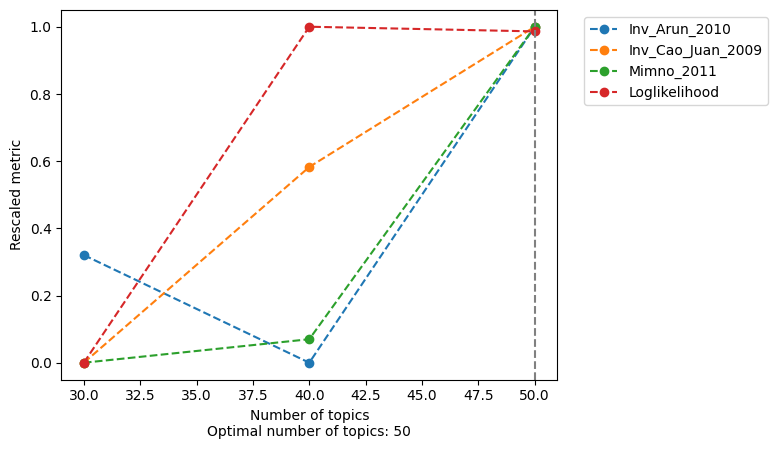

In [17]:
from pycisTopic.lda_models import evaluate_models
model = evaluate_models(
    models,
    select_model = 50,
    return_model = True
)

In [18]:
cistopic_obj.add_LDA_model(model)

In [19]:
pickle.dump(
    cistopic_obj,
    open(os.path.join(out_dir, "cistopic_obj.pkl"), "wb")
)